In [3]:
import numpy as np
from tomography import *
from NestedForLoop import get_iterator
import os
import glob
from efficiencies import get_channels_eff, set_raw_counts
from optimization import Optimizer, function_fidelity, FidelityResults
from constants import *
from pauliexpectations import *


In [4]:
working_dir = os.getcwd()
working_dir_data = os.getcwd()+'\StateTomoData'
working_dir=r"C:\Users\nicol\Desktop\Experiment"
os.chdir(working_dir)

In [5]:
######################################################
#----- CREATING THE FILES FOR AND THE COUNTS -------
######################################################


print('Creating the counts and files')
qubit_number=2
#bell=(np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])+np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]))/np.sqrt(2)
bell=(np.array([0,1,0,0])+np.array([0,0,1,0]))/np.sqrt(2)
Counts_file = np.zeros((3**qubit_number,2**qubit_number))
letters = ['x', 'y', 'z']
bases = []

def get_proj_iterator(N_qubit):
    d={"x": [[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]], "y":[[1/np.sqrt(2),complex(0,1/np.sqrt(2))],[1/np.sqrt(2),complex(0,-1/np.sqrt(2))]], "z":[[1,0],[0,1]] }
    basis_order= get_iterator(3,N_qubit)
    basis=["x","y","z"]
    projectors_order=get_iterator(2,N_qubit)
    columns=[]
    
    
    character_Matrix=[]
    for i in basis_order:
        string=""
        for j in i:
            string=string+basis[j]
        lines=[]    
        for k in projectors_order:
            o=0
            vect=[]
            for n in k:
                if o > 0:
                    vect=np.kron(vect,d[string[o]][n])
                else:
                    vect=d[string[o]][n]
                o=o+1
            lines.append(vect)    
        character_Matrix.append(lines)         
        columns.append(string)   
        
    return character_Matrix 
Projector_matrix=  get_proj_iterator(qubit_number)

for i in range(3**qubit_number):
    for j in range(2**qubit_number):
        Counts_file[i][j] = 100000*abs(np.trace(np.dot(np.outer(Projector_matrix[i][j],Projector_matrix[i][j]),np.outer(bell,bell))))  

for i in letters:
    if qubit_number == 1:
        base = i 
        bases.append(base)
    for j in letters:
        if qubit_number == 2:
            base = i + j
            bases.append(base)
        for k in letters:
            if qubit_number == 3:
                base = i + j + k 
                bases.append(base)
            for l in letters:
                if qubit_number == 4:
                    base = i + j + k + l
                    bases.append(base)

                    
for i in range(len(bases)):
    f = open(r"C:/Users/nicol/Desktop/Experiment/StateTomography_2Layers_20230330/StateTomo_2Layers/Bigiteration_0_" + str(bases[i]) + ".txt", "a")    
    f.truncate(0)
    for j in range(2**qubit_number):
        f.write(str(Counts_file[i,j]))
        f.write(' ')
    f.close()


Creating the counts and files


In [6]:
######################################################
#----- CREATING THE FILES FOR THE EFFICIENCIES -------
######################################################



print('Creating the counts and files for the efficiency')
letters = ['z', 'a']
bases = []

def get_proj_iterator(N_qubit):
    d={"z":[[1,0],[0,1]], "a":[[0,1],[1,0]]}
    basis_order= get_iterator(2,N_qubit)
    basis=["z","a"]
    projectors_order=get_iterator(2,N_qubit)
    columns=[]
    
    
    character_Matrix=[]
    for i in basis_order:
        string=""
        for j in i:
            string=string+basis[j]
        lines=[]    
        for k in projectors_order:
            o=0
            vect=[]
            for n in k:
                if o > 0:
                    vect=np.kron(vect,d[string[o]][n])
                else:
                    vect=d[string[o]][n]
                o=o+1
            lines.append(vect)    
        character_Matrix.append(lines)         
        columns.append(string)   
        
    return character_Matrix 
Projector_matrix2=  get_proj_iterator(qubit_number)

for i in range(2**qubit_number):
    for j in range(2**qubit_number):
        Counts_file[i][j] = 100000*abs(np.trace(np.dot(np.outer(Projector_matrix2[i][j],Projector_matrix2[i][j]),np.outer(bell,bell))))  

for i in letters:
    if qubit_number == 1:
        base = i 
        bases.append(base)
    for j in letters:
        if qubit_number == 2:
            base = i + j
            bases.append(base)
        for k in letters:
            if qubit_number == 3:
                base = i + j + k 
                bases.append(base)
            for l in letters:
                if qubit_number == 4:
                    base = i + j + k + l
                    bases.append(base)
                    
for i in range(len(bases)):
    f = open(r"C:/Users/nicol/Desktop/Experiment/StateTomography_2Layers_20230330/StateTomo_2Layers/Bigiteration_0_" + str(bases[i]) + ".txt", "a")    
    f.truncate(0)
    for j in range(2**qubit_number):
        f.write(str(Counts_file[i,j]))
        f.write(' ')
    f.close()


Creating the counts and files for the efficiency


In [8]:
######################################################################################################
#----- COUNTING THE FILES AND SAVING THEM IN AN ARRAY TO MAKES THE REST OF THE ANALYSIS EASIER -------
######################################################################################################

print('Getting the variables')

qubit_number=2

column_start=0

column_stop=4


#bell=(np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])+np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]))/np.sqrt(2)
bell=(np.array([0,0,1,0])+np.array([0,1,0,0]))/np.sqrt(2)
#bell=(np.array([1,0,0,0,0,0,0,0])+np.array([0,0,0,0,0,0,0,1]))/np.sqrt(2)
# bell=(np.array([0,1,0,0])-np.array([0,0,1,0]))/np.sqrt(2)
#bell=(np.array([0,1,0,0])+np.array([0,0,1,0]))/np.sqrt(2)
bellmatrix=np.array(np.outer(bell, np.conjugate(bell)))

error_runs=10

U=[]

bell_aux=[]

target_ini=[]


state_after=[]
state_after_file=[]

state_before=[]
state_before_file=[]

state = []
state_file=[]

xp_counts_corrected_with_eff=[]

statetomo = []

players=["Arya","Bran","Cersei","Dany"]


print('COUNTING THE FILES AND SAVING THEM IN AN ARRAY TO MAKES THE REST OF THE ANALYSIS EASIER')

n_files=0
working_dir=r"C:\Users\nicol\Desktop\Experiment"
os.chdir(working_dir)


filenames = [i for i in glob.glob("StateTomography_2Layers_*")]
filenames.sort(key=os.path.getmtime)

index_to_file = {}

for index, filename in enumerate(filenames):
    os.chdir(f"{working_dir}\\{filename}")
    filenames_aux=[i for i in glob.glob("StateTomo_2Layers*")]
    for index_second, filenames_aux_second in enumerate(filenames_aux):
        index_to_file[n_files] = f"{filename}\\{filenames_aux_second}"
        n_files+=1

os.chdir(working_dir)

#####################################################################
#---------------------- STATE TOMOGRAPHY ----------------------------
#####################################################################

for index in range(len(index_to_file)):
    os.chdir(f"{working_dir}\\{index_to_file[index]}\\")
    datafiles=[i for i in glob.glob("*")]
                
    ### Calculating the efficiencies of each detector
    efficiencies=get_channels_eff(datafiles,qubit_number, column_start, column_stop, os.getcwd())
    ##efficiencies_2_emissions=get_channels_eff(datafiles,qubit_number, column_start_2_emissions, column_stop_2_emissions, os.getcwd())
    print('Calculating the efficiencies :', efficiencies )


    ### Opening the data files and writing the data in counts_aux array
    counts_aux=set_raw_counts(datafiles, qubit_number, column_start, column_stop, os.getcwd())
    xp_counts=np.array(np.transpose(counts_aux))
    print('Gathering the counts : ',xp_counts)

 
    ##counts_aux_2_emissions=set_raw_counts(datafiles, qubit_number, column_start_2_emissions, column_stop_2_emissions, os.getcwd())
    ##xp_counts_2_emissions=np.array(np.transpose(counts_aux_2_emissions))

    print('Performing the tomography')
    statetomo.append(LRETomography(int(qubit_number),xp_counts))
    statetomo[-1].run(correct_eff=efficiencies)#,correct_double_emission = efficiencies_2_emissions)
    xp_counts_corrected_with_eff.append(statetomo[-1].xp_counts)
    state.append(statetomo[-1])#.state)
    state_file.append(index_to_file[index])
    print('Tomography file :',statetomo[-1].state)

print('OPTIMIZATION OF MAX FIDELITY UP TO UNITARIES')

states=state

states_file=state_file

fid=np.zeros((n_files))

print('Guessing the optimizations variables')

guess=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])

bounds=[(-np.pi,np.pi)]*9

results = []

optimized_matrix=np.zeros((n_files,2**qubit_number,2**qubit_number), dtype='complex')

print('Getting the unitary')

opt=Optimizer(guess,function_fidelity, results=FidelityResults)

for index in range(len(states)):

    result=opt.optimize(qubit_number,states[index].state, bell,bounds=bounds)
    results.append(result)
    
for index in range(len(states)):
    target=bellmatrix
    U.append(results[index].correct(qubit_number))
    target_ini.append(np.transpose(np.conjugate(U[-1]))@bellmatrix@U[-1]) 
       
    
    states[index].calculate_fidelity_error(players, error_runs, opt, target, optimization=True, bounds=bounds)
    
    print('file, fidelity, fidelity_mean, fidelity_std: ',
          states_file[index], np.round(states[index].state.fidelity(target_ini[-1]),5), -np.round(states[index].fidelity_mu,5),np.round(states[index].fidelity_std,5), '\n')

Getting the variables
COUNTING THE FILES AND SAVING THEM IN AN ARRAY TO MAKES THE REST OF THE ANALYSIS EASIER
Calculating the efficiencies : [1. 1. 1. 1.]
Gathering the counts :  [[50000.     0.     0. 50000.]
 [25000. 25000. 25000. 25000.]
 [25000. 25000. 25000. 25000.]
 [25000. 25000. 25000. 25000.]
 [50000.     0.     0. 50000.]
 [25000. 25000. 25000. 25000.]
 [25000. 25000. 25000. 25000.]
 [25000. 25000. 25000. 25000.]
 [    0. 50000. 50000.     0.]]
Performing the tomography
Tomography file : array([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]])
OPTIMIZATION OF MAX FIDELITY UP TO UNITARIES
Guessing the optimizations variables
Getting the unitary
Simulating new states considering the uncertainties
Optimizing the fidelity between input and target up to a unitary
file, fidelity, fidelity_mean, fidelity_std:  StateTomography_2Layers_20230330\StateTomo_2Layers 

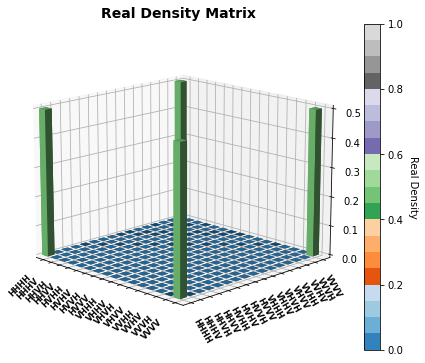

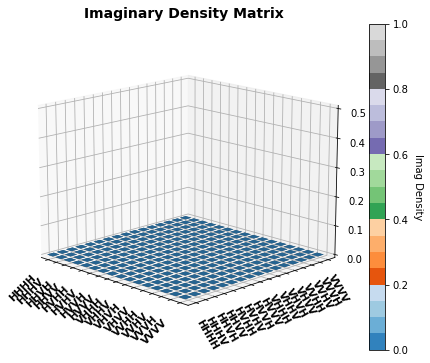

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

bell = (np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) + np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])) / np.sqrt(2)
bellmatrix=np.array(np.outer(bell, np.conjugate(bell)))

# Example density matrix
density_matrix_plot = bellmatrix
real_density_matrix = density_matrix_plot.real
imag_density_matrix = density_matrix_plot.imag
HV_label = {0: "H", 1: "V"}

HV_iterator = get_iterator(2, 4)
axes_labels = []
for k in range(np.shape(density_matrix_plot)[0]):
    axes_labels.append("".join(tuple(map(HV_label.get, HV_iterator[k]))))

nrows, ncols = density_matrix_plot.shape

# Create a meshgrid for the x and y values
x = np.arange(ncols)
y = np.arange(nrows)
X, Y = np.meshgrid(x, y)

# Flatten the density matrix values
Z = real_density_matrix.flatten()
W = imag_density_matrix.flatten()

# Set the column heights as Z values
column_heights = abs(Z)
column_heights2 = abs(W)

# Set the column widths and depths
column_width = column_depth = 0.7

# Create the first figure
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')

# Plot the density matrix as 3D columns using a colormap
cmap = cm.get_cmap('tab20c')
ax1.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z), column_width, column_depth, column_heights, shade=True, color=cmap(Z))

ax1.set_xticks(np.arange(ncols) + 0.5)
ax1.set_yticks(np.arange(nrows) + 0.5)
ax1.set_xticklabels(axes_labels, rotation=45, ha='right', fontsize=8, fontweight='bold')
ax1.set_yticklabels(axes_labels, rotation=-60,fontsize=8, fontweight='bold')

# Set the title
ax1.set_title('Real Density Matrix', fontsize=14, fontweight='bold')

# Add a colorbar
cbar = fig1.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax1)
cbar.set_label('Real Density', rotation=270, labelpad=15)

# Adjust plot limits to avoid cutoff of tick labels
ax1.set_xlim(0, ncols)
ax1.set_ylim(0, nrows)
ax1.view_init(elev=15, azim=-45)
# Create the second figure
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')

# Plot the density matrix as 3D columns using a colormap
ax2.bar3d(X.ravel(), Y.ravel(), np.zeros_like(W), column_width, column_depth, column_heights2, shade=True, color=cmap(W),zsort='max')

# Set the x and y axis labels
ax2.set_xticks(np.arange(ncols) + 0.5)
ax2.set_yticks(np.arange(nrows) + 0.5)
ax2.set_xticklabels(axes_labels, rotation=45, ha='right', fontsize=10, fontweight='bold')
ax2.set_yticklabels(axes_labels, rotation=-60, fontsize=10, fontweight='bold')
ax2.set_zlim(0, np.max([column_heights, column_heights2]))  # Set z-axis limits

# Set the title
ax2.set_title('Imaginary Density Matrix', fontsize=14, fontweight='bold')

# Add a colorbar
cbar = fig2.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax2)
cbar.set_label('Imag Density', rotation=270, labelpad=15)

# Adjust plot limits to avoid cutoff of tick labels
ax2.set_xlim(0, ncols)
ax2.set_ylim(0, nrows)
ax2.view_init(elev=15, azim=-45)
# Display the figures
plt.show()


In [43]:
Y.ravel()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])